# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Tiago Reis Mingossi </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [4]:
#Abrir o arquivo
tabela = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(tabela))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [5]:
tabela.head(6)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [6]:
tabela.loc[(tabela.Latitude>0),'Hemisferio'] = 'Norte'
tabela.loc[(tabela.Latitude<0),'Hemisferio'] = 'Sul'

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

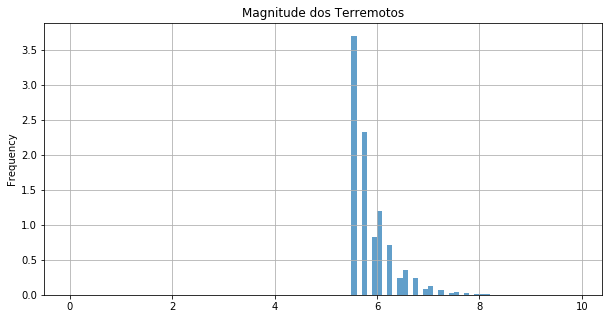

In [7]:
fig =plt.figure(figsize=(10,5))
faixa = np.arange(0,10,0.1)
plot = tabela.Magnitude.plot.hist(bins= faixa,title='Magnitude dos Terremotos', normed=1, alpha = 0.7)
plt.grid()
plt.show()

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
pd.crosstab(tabela.Hemisferio, tabela.Type, normalize=True)

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Norte,0.447140,0.000085,0.006279,0.000000
Sul,0.545171,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [9]:
probabilidade=pd.crosstab(tabela.Type, tabela.Hemisferio=="Norte", margins=True, normalize=True)*100
print(probabilidade)
print('\n')
print((44.712113*100)/99.231164)

Hemisferio             False       True         All
Type                                               
Earthquake         54.519050  44.712113   99.231164
Explosion           0.008543   0.008543    0.017085
Nuclear Explosion   0.119597   0.627883    0.747480
Rock Burst          0.004271   0.000000    0.004271
All                54.651461  45.348539  100.000000


45.0585392709895


Explique o seu raciocínio

A probabilidade de um terremoto acontecer no hemisferio é de 45.0585392709895%, pois devemos considerar que a probabilidade total de acontecer um terremoto seja de 99.231164% e nao 100%.
Assim com uma simples regra de tres chegamos a tal resultado :
99.231164 ---- 100
44.712113 ---- x
x=45.0585392709895

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [10]:
print(probabilidade)
print('\n')
print((0.627883*100)/45.348539)

Hemisferio             False       True         All
Type                                               
Earthquake         54.519050  44.712113   99.231164
Explosion           0.008543   0.008543    0.017085
Nuclear Explosion   0.119597   0.627883    0.747480
Rock Burst          0.004271   0.000000    0.004271
All                54.651461  45.348539  100.000000


1.3845716176214629


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

de 1.3845716176214629%


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

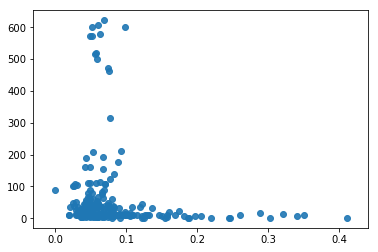

In [21]:
scatter_plot = plt.scatter(tabela['Magnitude Error'], tabela['Depth'], alpha = 0.9)
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [14]:
correlacao = tabela['Magnitude Error'].corr(tabela['Depth'])
correlacao

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

O valor calculado acima, representa o valor na qual ambas as variáveis estão correlacionadas uma a outra. No caso o valor da relação ente Depth e Magnitude Error 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


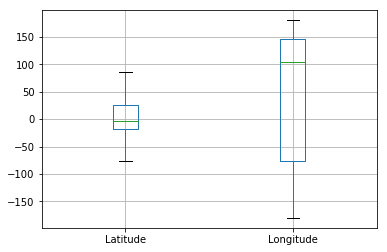

In [18]:
tabela.boxplot(column=['Latitude', 'Longitude'])
lat = tabela.Latitude.describe()
long = tabela.Longitude.describe()

print(lat)
print('\n')
print(long)

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [20]:
tabela.loc[(tabela.Type=="Nuclear Explosion")&(tabela["Magnitude Type"]=="MB")&(tabela["Hemisferio"]=="Sul"),"Regiao"]="Sul"
tabela.loc[(tabela.Type=="Nuclear Explosion")&(tabela["Magnitude Type"]=="MB")&(tabela["Hemisferio"]=="Norte"),"Regiao"]="Norte"
tabela["Regiao"].value_counts("Sul")

Norte    0.828221
Sul      0.171779
Name: Regiao, dtype: float64